In [74]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [75]:
scp=pd.read_csv('Advertising.csv',index_col=0)
scp

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [76]:
scp.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [77]:
scp.tail(5)

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [78]:
scp.shape

(200, 4)

In [79]:
# Statisticals Description
scp.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [80]:
# finding correlation with data
scp.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


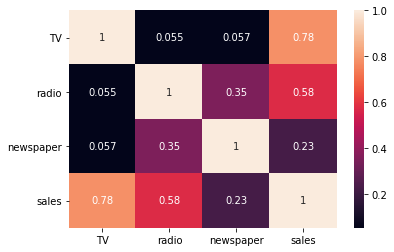

In [81]:
sns.heatmap(scp.corr(),annot=True)

In [82]:
# finding null values
scp.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

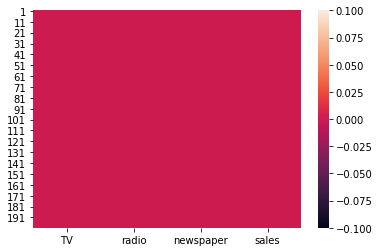

In [83]:
# finding null values using heatmap
sns.heatmap(scp.isnull())

{'whiskers': [<matplotlib.lines.Line2D at 0x1904e01ff08>,
 'caps': [<matplotlib.lines.Line2D at 0x1904e009d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1904dfd7bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1904e009e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1904e00fd48>],
 'means': []}

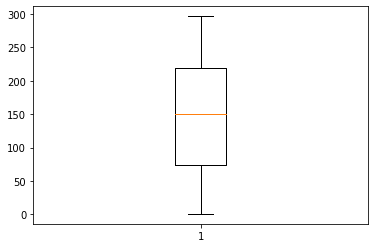

In [84]:
# Univariate analysis
plt.boxplot(scp['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1904e031ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x1904e01da08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1904e008ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1904e01dd88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1904e020a48>],
 'means': []}

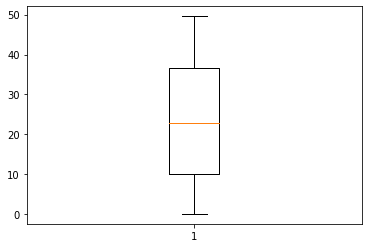

In [85]:
plt.boxplot(scp['radio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1904dc364c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1904dc36fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1904dc2b0c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1904cedcac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1904cedcf08>],
 'means': []}

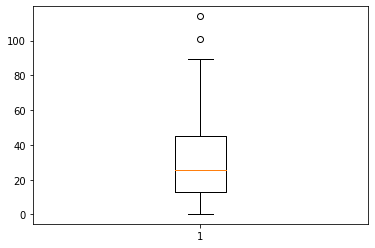

In [86]:
plt.boxplot(scp['newspaper'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1904df5af08>,
 'caps': [<matplotlib.lines.Line2D at 0x1904df41ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1904df7c7c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1904df64e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1904df64c08>],
 'means': []}

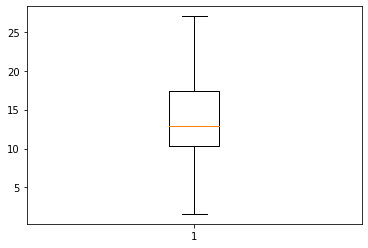

In [87]:
plt.boxplot(scp['sales'])

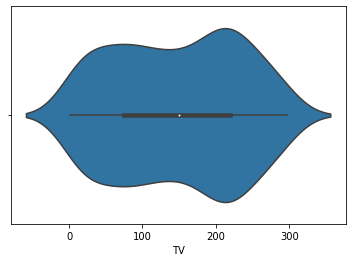

In [88]:
sns.violinplot(scp['TV'])

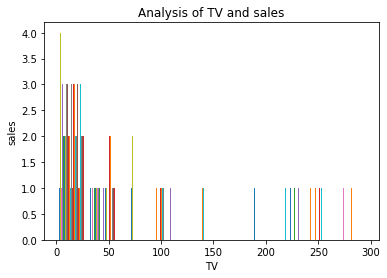

In [89]:
# using Bivariate analysis
plt.hist(scp)
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('Analysis of TV and sales')
plt.show()

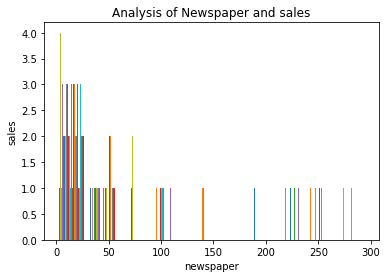

In [90]:
# sales and Newspaper relationship
plt.hist(scp)
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.title('Analysis of Newspaper and sales')
plt.show()

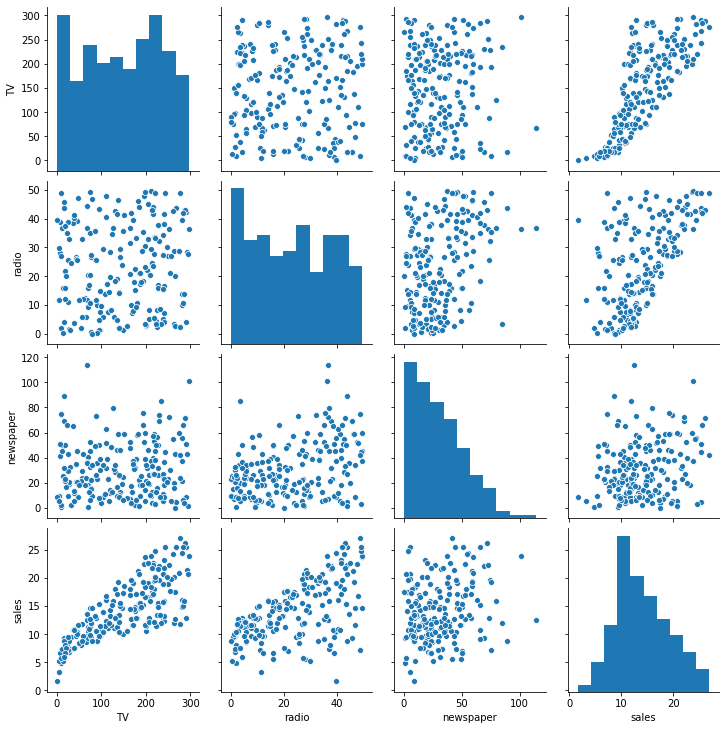

In [91]:
# it is showing sales and TV has strong relationship
sns.pairplot(scp)

In [92]:
# finding the information about the columns i.e datatype of each columns
scp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 17.8 KB


In [93]:
# finding Skewed data
scp.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [94]:
for col in scp.columns:
    if scp.skew().loc[col]>0.55:
        scp[col]=np.log1p(scp[col])

In [95]:
scp.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

In [96]:
from scipy.stats import zscore
z=np.abs(zscore(scp))
z

array([[9.69852266e-01, 9.81522472e-01, 1.27054817e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 7.84008452e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.27219508e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.07922051e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.07727442e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 1.36239293e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 5.26522686e-02, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 7.16694174e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 2.84612391e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 6.14011337e-02, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 8.52446540e-02, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.78601844e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.21484164e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.21367806e

In [97]:
threshold=3
print(np.where(z>3))

(array([33], dtype=int64), array([2], dtype=int64))


In [98]:
spn=scp[(z<3).all(axis=1)]
spn

,TV,radio,newspaper,sales
1,230.1,37.8,4.251348,22.1
2,44.5,39.3,3.830813,10.4
3,17.2,45.9,4.252772,9.3
4,151.5,41.3,4.085976,18.5
5,180.8,10.8,4.084294,12.9
...,...,...,...,...
196,38.2,3.7,2.694627,7.6
197,94.2,4.9,2.208274,9.7
198,177.0,9.3,2.001480,12.8
199,283.6,42.0,4.207673,25.5


In [99]:
print(scp.shape)
print(spn.shape)

(200, 4)
(199, 4)


# Spliting the data into input and output variables


In [100]:
x=spn.iloc[:,0:-1]
x.head()

,TV,radio,newspaper
1,230.1,37.8,4.251348
2,44.5,39.3,3.830813
3,17.2,45.9,4.252772
4,151.5,41.3,4.085976
5,180.8,10.8,4.084294


In [101]:
y=spn.iloc[:,-1]
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [102]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
lrg=LinearRegression()
lrg.fit(x_train,y_train)
lrg_pre=lrg.predict(x_test)

In [104]:
lrg.coef_

array([0.04732397, 0.18558884, 0.07592413])

In [105]:
lrg.intercept_

2.4824369770074526

In [106]:
lrg.score(x_train,y_train)

0.901029661481333

In [107]:
# finding the best fit random state
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lrg=LinearRegression()
    lrg.fit(x_train,y_train)
    lrg_pre=lrg.predict(x_test)
    r2_scr=r2_score(y_test,lrg_pre)
    print('r2 score is cooresponding to',r_state,'is:',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print()
print('Max r2 is cooresponding to ',final_r_state,'is:',max_r_score)

r2 score is cooresponding to 42 is: 0.8677924272802667
r2 score is cooresponding to 43 is: 0.9048262770819535
r2 score is cooresponding to 44 is: 0.8576669494009768
r2 score is cooresponding to 45 is: 0.789384476609376
r2 score is cooresponding to 46 is: 0.8707553707974439
r2 score is cooresponding to 47 is: 0.893544142431822
r2 score is cooresponding to 48 is: 0.8637716294719928
r2 score is cooresponding to 49 is: 0.8130088614289
r2 score is cooresponding to 50 is: 0.8464090280108073
r2 score is cooresponding to 51 is: 0.9073797001301336
r2 score is cooresponding to 52 is: 0.9024139483388717
r2 score is cooresponding to 53 is: 0.8843777037202283
r2 score is cooresponding to 54 is: 0.8369002978122061
r2 score is cooresponding to 55 is: 0.8302981595828365
r2 score is cooresponding to 56 is: 0.8791107891889826
r2 score is cooresponding to 57 is: 0.9213518240479954
r2 score is cooresponding to 58 is: 0.9215525000994325
r2 score is cooresponding to 59 is: 0.9272066391156045
r2 score is coo

In [108]:
lg_pre=lrg.predict(x_test)
print('Predicted Result Price is ',lg_pre)
print('Actual Price is ',y_test)

Predicted Result Price is  [21.34403954  6.69231337 13.7185724   8.6173807   8.19587284 12.72040182
 14.7668536  11.89097835 13.65940408  9.32213968 15.5076231  21.60782559
 13.3698606  17.27529674 12.33626861  5.23934371  8.03159956 18.17240634
 12.57441485 21.91093762  7.80765983  8.82210656 10.11989954  9.08091999
 16.85221741 20.63845277 15.15011718 15.31317095 16.89009879 10.09230319
 14.28233335 18.45849879 11.41989817 18.57180098  7.08697536 24.17630062
  9.92586451  6.4605958  12.92445323 20.3016442 ]
Actual Price is  94     22.2
120     6.6
175    11.5
67      9.5
192     9.9
51     11.4
82     12.3
68     13.4
136    11.6
141    10.9
38     14.7
48     23.2
168    12.2
42     17.1
180    12.6
196     7.6
25      9.7
154    19.0
10     10.6
129    24.7
122     7.0
45      8.5
83     11.3
52     10.7
65     18.0
53     22.6
46     14.9
86     15.2
100    17.2
145    11.4
84     13.6
15     19.0
87     12.0
185    17.6
108     8.7
99     25.4
74     11.0
128     8.8
17     12.5


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=90)
lrg=LinearRegression()
lrg.fit(x_train,y_train)
lrg_pre=lrg.predict(x_test)
print('r2 score is ',r2_score(y_test,lrg_pre))
print('RSME is ',np.sqrt(mean_squared_error(y_test,lrg_pre)))

r2 score is  0.9428082768842401
RSME is  1.2069732201545371


In [110]:
cross_val_score(LinearRegression(),x,y,cv=5,scoring='r2').mean()

0.8872005567864957

In [111]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pre=dtr.predict(x_test)
print('r2 score is ',r2_score(y_test,dtr_pre))
print('RSME is ',np.sqrt(mean_squared_error(y_test,dtr_pre)))

r2 score is  0.9239751775912272
RSME is  1.3915818337417316


In [112]:
cross_val_score(DecisionTreeRegressor(),x,y,cv=5,scoring='r2').mean()

0.9580852209692494

In [113]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pre=rfr.predict(x_test)
print('r2 score is ',r2_score(y_test,rfr_pre))
print('RSME is ',np.sqrt(mean_squared_error(y_test,rfr_pre)))

r2 score is  0.9844413120219773
RSME is  0.629531591741032


In [114]:
cross_val_score(RandomForestRegressor(),x,y,cv=5,scoring='r2').mean()

0.9762926274006037

# I choose RandomForestRegressor for making the model because it is showing Very low RMSE and High Accuracy i.e. r2_score 

In [115]:
models= [RandomForestRegressor(),DecisionTreeRegressor(),LinearRegression()]
for m in models:
    m.fit(x_train,y_train)
    m_pre=m.predict(x_test)
    print('\n')
    print('--->',m,'\n')
    print('R2 Score is ',r2_score(y_test,m_pre),'\n')
    print('Cross Validation Score is',cross_val_score(m,x,y,cv=5,scoring='r2').mean(),'\n')
    print('RMSE is ',np.sqrt(mean_squared_error(y_test,m_pre)))



---> RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

R2 Score is  0.9844602200803778 

Cross Validation Score is 0.9761123264311854 

RMSE is  0.6291489489779001


---> DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=

In [116]:
from sklearn.externals import joblib
joblib.dump(rfr,'Sales_Channel_Prediction.pkl')

['Sales_Channel_Prediction.pkl']